# TODO

- [] Test more images and kidneys.
- [] Test training is easier with these changes. First train with kidney_2.
- [] Figure out why the clipped images look different when displaying with PIL.

In [1]:
import torch
from PIL import Image
from torch import nn
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
input_dir = "/kaggle/input/blood-vessel-segmentation/"
train_dir = input_dir + "train/"

In [2]:
k1_dir = train_dir + "kidney_1_dense/"
k2_dir = train_dir + "kidney_2/"
k3_dir = train_dir + "kidney_3_sparse/"

In [3]:
slice_id = "0500"
k2_img_path = k2_dir + "images/" + f"{slice_id}.tif"
k3_img_path = k3_dir + "images/" + f"{slice_id}.tif"
k2_img = Image.open(k2_img_path)
k3_img = Image.open(k3_img_path)
k2_arr = np.array(k2_img)
k3_arr = np.array(k3_img)

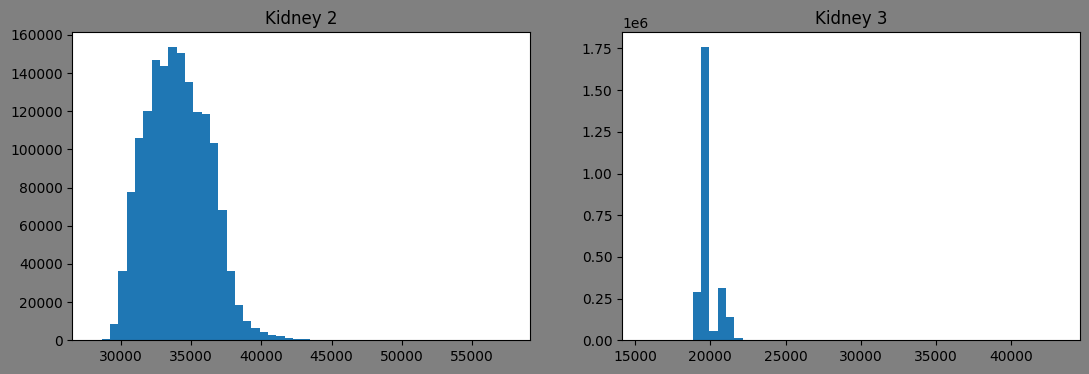

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
fig.set_facecolor("gray")

axs[0].set_title("Kidney 2")
axs[1].set_title("Kidney 3")
axs[0].hist(k2_arr.reshape(-1), 50)
axs[1].hist(k3_arr.reshape(-1), 50)
plt.show()

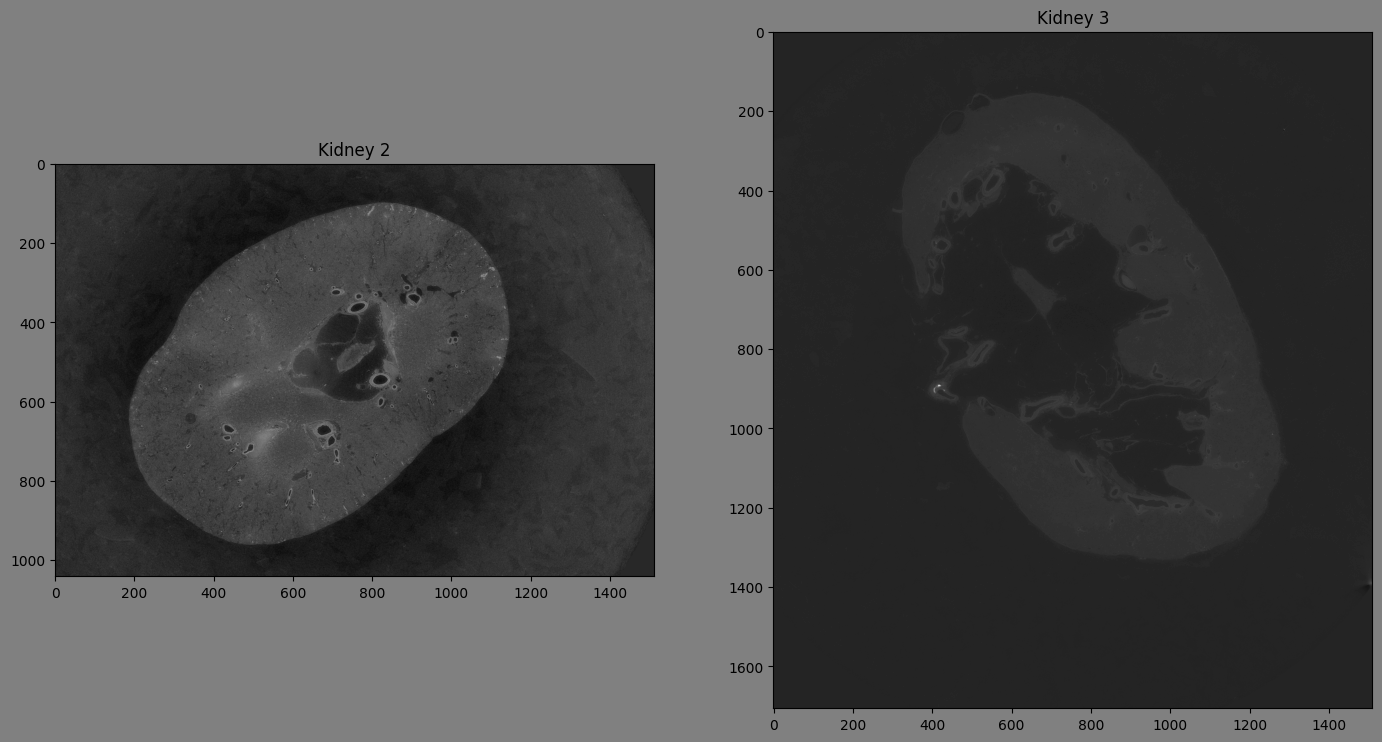

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(17, 12))
fig.set_facecolor("gray")
axs[0].set_title("Kidney 2")
axs[1].set_title("Kidney 3")
axs[0].imshow(k2_arr, cmap="gray")
axs[1].imshow(k3_arr, cmap="gray")
plt.show()

In [6]:
k2_mean, k2_std = k2_arr.mean(), k2_arr.std()
k3_mean, k3_std = k3_arr.mean(), k3_arr.std()

print("k2 mean:", k2_mean.round(3))
print("k2 std :", k2_std.round(3))
print("k3 mean:", k3_mean.round(3))
print("k3 std :", k3_std.round(3))

k3_arr_norm = (k3_arr - k2_mean) / k2_std

k2 mean: 34064.194
k2 std : 2194.342
k3 mean: 19789.962
k3 std : 604.494


### Normalizing k3 to k2 statistics doesn't seem to work

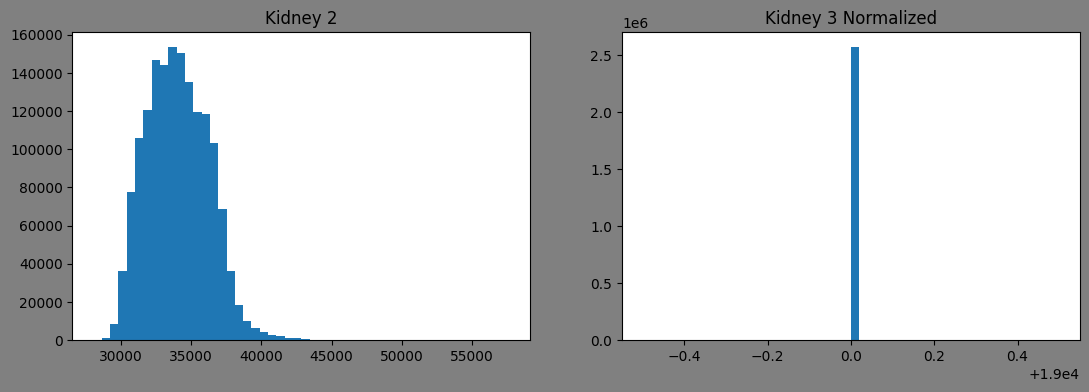

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
fig.set_facecolor("gray")

axs[0].set_title("Kidney 2")
axs[1].set_title("Kidney 3 Normalized")
axs[0].hist(k2_arr.reshape(-1), 50)
axs[1].hist(k3_arr_norm.clip(19000, 24000).reshape(-1), 50)
plt.show()

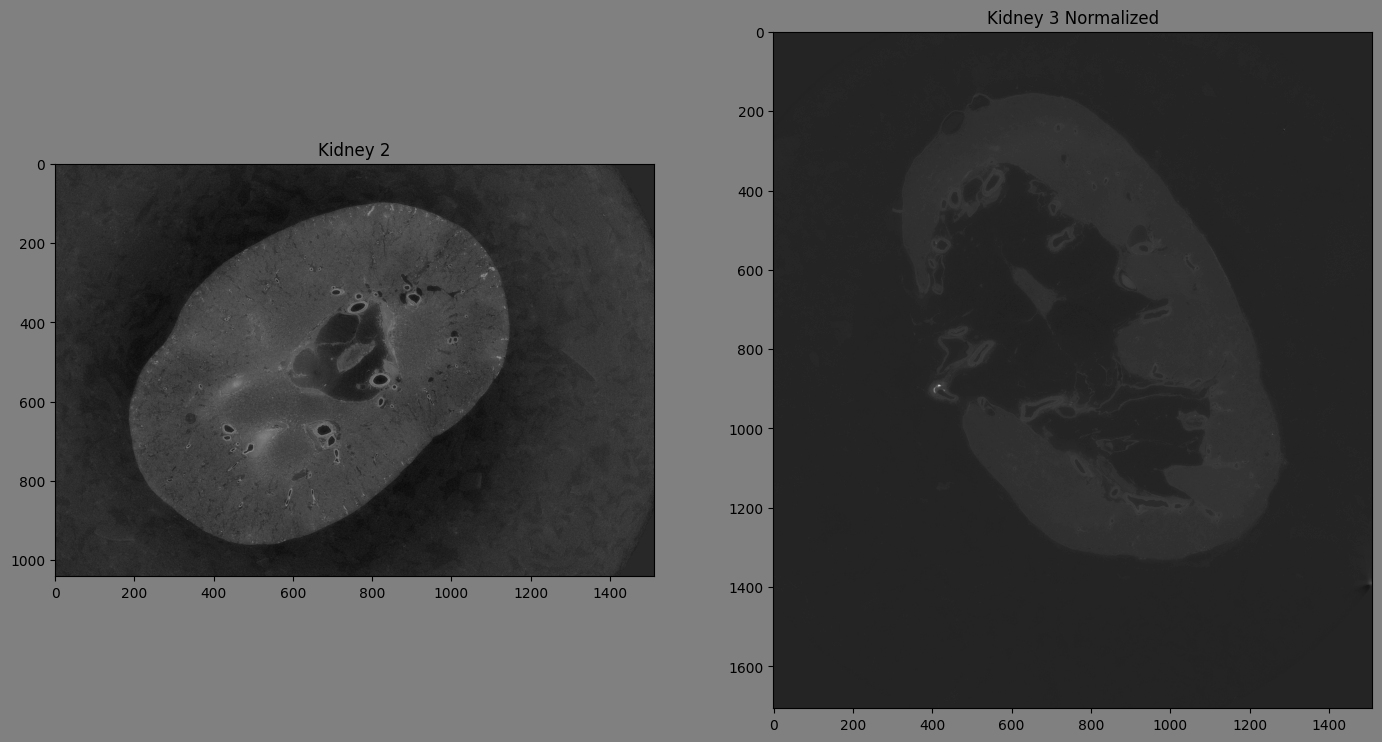

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(17, 12))
fig.set_facecolor("gray")
axs[0].set_title("Kidney 2")
axs[1].set_title("Kidney 3 Normalized")
axs[0].imshow(k2_arr, cmap="gray")
axs[1].imshow(k3_arr_norm, cmap="gray")
plt.show()

### ¿How about cliping?

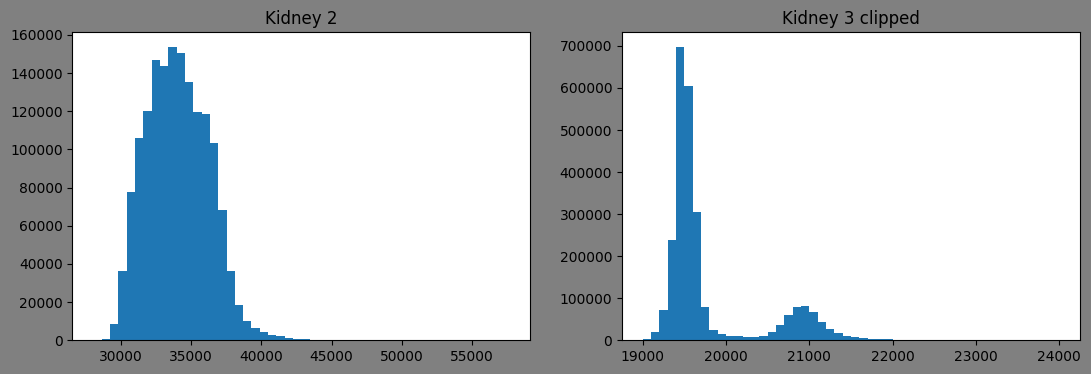

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
fig.set_facecolor("gray")

axs[0].set_title("Kidney 2")
axs[1].set_title("Kidney 3 clipped")
axs[0].hist(k2_arr.reshape(-1), 50)
axs[1].hist(k3_arr.clip(19000, 24000).reshape(-1), 50)
plt.show()

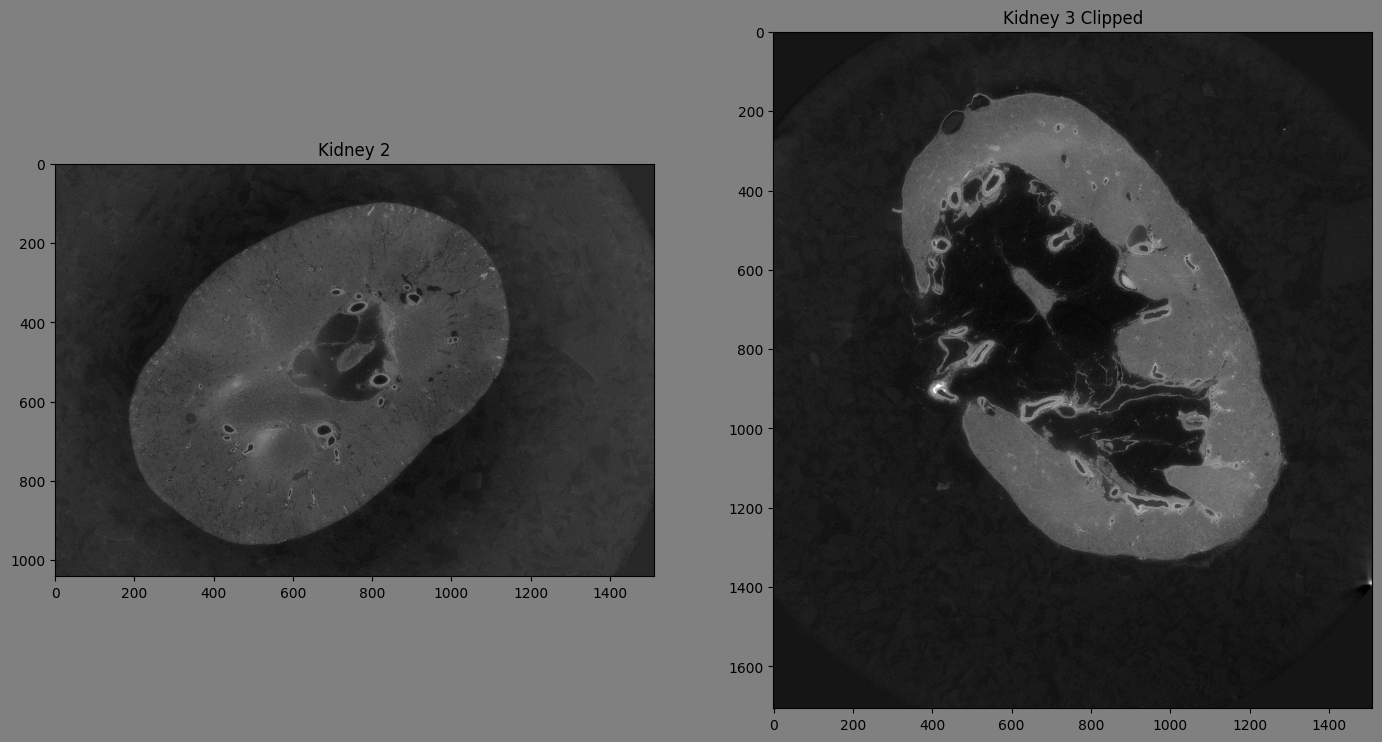

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(17, 12))
fig.set_facecolor("gray")
axs[0].set_title("Kidney 2")
axs[1].set_title("Kidney 3 Clipped")
axs[0].imshow(k2_arr, cmap="gray")
axs[1].imshow(k3_arr.clip(19000, 24000), cmap="gray")
plt.show()

### Clipping experimentation

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive


def plot_image_with_clip(min_clip, max_clip):
    plt.figure(figsize=(10, 5))
    plt.imshow(k3_arr.clip(min_clip, max_clip), cmap="gray")
    plt.colorbar()
    plt.show()


# Create interactive sliders
interactive_plot = interactive(
    plot_image_with_clip, min_clip=(k3_arr.min(), k3_arr.max()), max_clip=(k3_arr.min(), k3_arr.max())
)
output = interactive_plot.children[-1]
output.layout.height = "400px"
interactive_plot

interactive(children=(IntSlider(value=29343, description='min_clip', max=43170, min=15516), IntSlider(value=29…

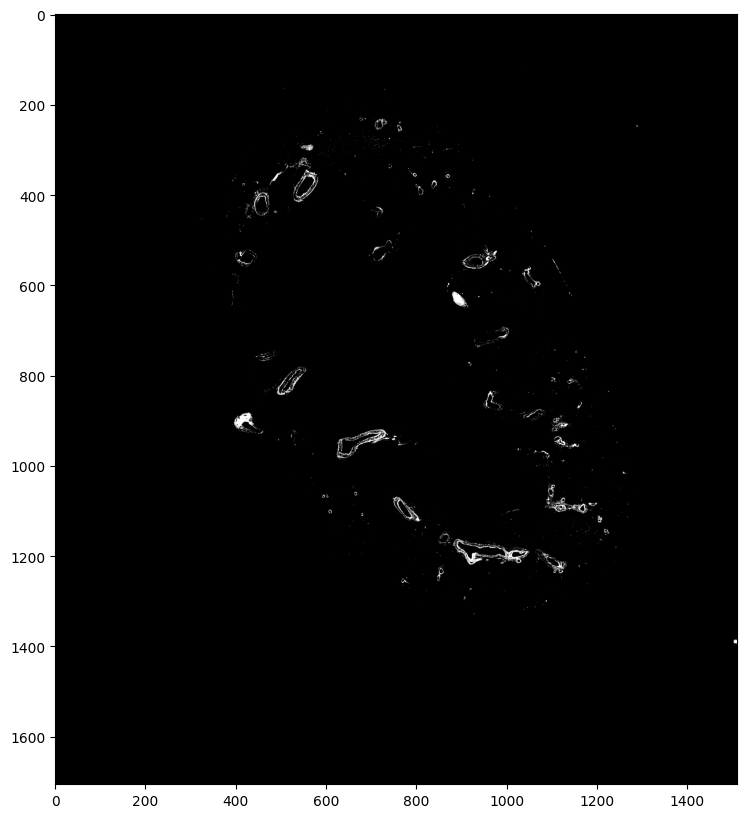

In [11]:
plt.figure(figsize=(20, 10))
plt.imshow(k3_arr.clip(21500, 22000), cmap="gray")
plt.show()